## Limpieza de Datos

In [4]:
import pandas as pd
import glob

# Cargar los archivos de un directorio
archivos = glob.glob('./Data/*.csv')

# Crear lista para muestras
muestras = []

# Iterar cada archivo para sacar una muestra aleatoria
for archivo in archivos:
    data = pd.read_csv(archivo)
    
    muestra = data.sample(frac=0.2)  
    muestras.append(muestra)

# Concatenar las muestras
muestra_concatenada = pd.concat(muestras, ignore_index=True)

# Guardar la muestra concatenada
muestra_concatenada.to_csv('./Data.csv', index=False)


C:\Users\denis\AppData\Local\Temp\ipykernel_31284\1196747608.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(archivo)
C:\Users\denis\AppData\Local\Temp\ipykernel_31284\1196747608.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(archivo)
C:\Users\denis\AppData\Local\Temp\ipykernel_31284\1196747608.py:12: DtypeWarning: Columns (2,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(archivo)
C:\Users\denis\AppData\Local\Temp\ipykernel_31284\1196747608.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(archivo)
C:\Users\denis\AppData\Local\Temp\ipykernel_31284\1196747608.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(archivo)
C:\Use

In [5]:
# Leer el archivo   
df = pd.read_csv('Data.csv')

# Forma del dataframe
df.shape

C:\Users\denis\AppData\Local\Temp\ipykernel_31284\3800025677.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data.csv')


(1683090, 10)

In [6]:
# Información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683090 entries, 0 to 1683089
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Genero_Usuario         1683090 non-null  object 
 1   Edad_Usuario           1683090 non-null  int64  
 2   Bici                   1683090 non-null  object 
 3   Ciclo_Estacion_Retiro  1683090 non-null  int64  
 4   Fecha_Retiro           1683090 non-null  object 
 5   Hora_Retiro            1683090 non-null  object 
 6   Ciclo_Estacion_Arribo  1683090 non-null  int64  
 7   Fecha_Arribo           1683090 non-null  object 
 8   Hora_Arribo            1683090 non-null  object 
 9   Unnamed: 9             0 non-null        float64
dtypes: float64(1), int64(3), object(6)
memory usage: 128.4+ MB


In [7]:
# Revision de columnas 9 
df.iloc[:, 9]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1683085   NaN
1683086   NaN
1683087   NaN
1683088   NaN
1683089   NaN
Name: Unnamed: 9, Length: 1683090, dtype: float64

In [8]:
# Eliminación de columnas 9 
df.drop(df.columns[9], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683090 entries, 0 to 1683089
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   Genero_Usuario         1683090 non-null  object
 1   Edad_Usuario           1683090 non-null  int64 
 2   Bici                   1683090 non-null  object
 3   Ciclo_Estacion_Retiro  1683090 non-null  int64 
 4   Fecha_Retiro           1683090 non-null  object
 5   Hora_Retiro            1683090 non-null  object
 6   Ciclo_Estacion_Arribo  1683090 non-null  int64 
 7   Fecha_Arribo           1683090 non-null  object
 8   Hora_Arribo            1683090 non-null  object
dtypes: int64(3), object(6)
memory usage: 115.6+ MB


In [9]:
# Revision de datos nulos 
df.isnull().sum()

Genero_Usuario           0
Edad_Usuario             0
Bici                     0
Ciclo_Estacion_Retiro    0
Fecha_Retiro             0
Hora_Retiro              0
Ciclo_Estacion_Arribo    0
Fecha_Arribo             0
Hora_Arribo              0
dtype: int64

In [10]:
# Revision de los primeros 5 registros
df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,23,11925,279,06/01/2019,6:52:49,294,06/01/2019,6:58:59
1,M,37,98,103,11/01/2019,14:07:24,254,11/01/2019,14:11:00
2,M,26,10441,174,03/01/2019,10:18:32,27,03/01/2019,10:26:10
3,M,32,9082,176,09/01/2019,8:34:16,19,09/01/2019,8:43:47
4,M,55,10453,45,27/01/2019,8:10:21,256,27/01/2019,8:28:22


In [11]:
print(df['Hora_Retiro'])

0           6:52:49
1          14:07:24
2          10:18:32
3           8:34:16
4           8:10:21
             ...   
1683085     0:27:57
1683086    16:12:33
1683087     9:45:37
1683088    20:27:15
1683089    21:56:31
Name: Hora_Retiro, Length: 1683090, dtype: object


In [12]:
# Transformación de fechas y horas 
df['Fecha_Retiro'] = pd.to_datetime(df['Fecha_Retiro'], format='%d/%m/%Y')

df['Hora_Retiro'] = df['Hora_Retiro'].str.replace('::', ':00:00')
df['Hora_Retiro'] = pd.to_timedelta(df['Hora_Retiro'] )
df['Hora_Retiro'] = df['Hora_Retiro'].dt.components.apply(
    lambda x: f"{x.hours:02}:{x.minutes:02}:{x.seconds:02}", axis=1
)


df['Hora_Arribo'] = df['Hora_Arribo'].str.replace('::', ':00:00')
df['Hora_Arribo'] = pd.to_timedelta(df['Hora_Arribo'])
df['Hora_Arribo'] = df['Hora_Arribo'].dt.components.apply(
    lambda x: f"{x.hours:02}:{x.minutes:02}:{x.seconds:02}", axis=1
)


df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,23,11925,279,2019-01-06,06:52:49,294,06/01/2019,06:58:59
1,M,37,98,103,2019-01-11,14:07:24,254,11/01/2019,14:11:00
2,M,26,10441,174,2019-01-03,10:18:32,27,03/01/2019,10:26:10
3,M,32,9082,176,2019-01-09,08:34:16,19,09/01/2019,08:43:47
4,M,55,10453,45,2019-01-27,08:10:21,256,27/01/2019,08:28:22


In [13]:
df['Fecha_Arribo'] = pd.to_datetime(df['Fecha_Arribo'], format='%d/%m/%Y', errors='coerce')

df = df.dropna(subset=['Fecha_Arribo'])
df.head()


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,23,11925,279,2019-01-06,06:52:49,294,2019-01-06,06:58:59
1,M,37,98,103,2019-01-11,14:07:24,254,2019-01-11,14:11:00
2,M,26,10441,174,2019-01-03,10:18:32,27,2019-01-03,10:26:10
3,M,32,9082,176,2019-01-09,08:34:16,19,2019-01-09,08:43:47
4,M,55,10453,45,2019-01-27,08:10:21,256,2019-01-27,08:28:22


In [14]:
# Exploración de datos generales 

# Genero
print(df['Genero_Usuario'].unique())

# Edad
print(sorted(df['Edad_Usuario'].unique()))


['M' 'F']
[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 92, 97, 118, 119]


## Visualización

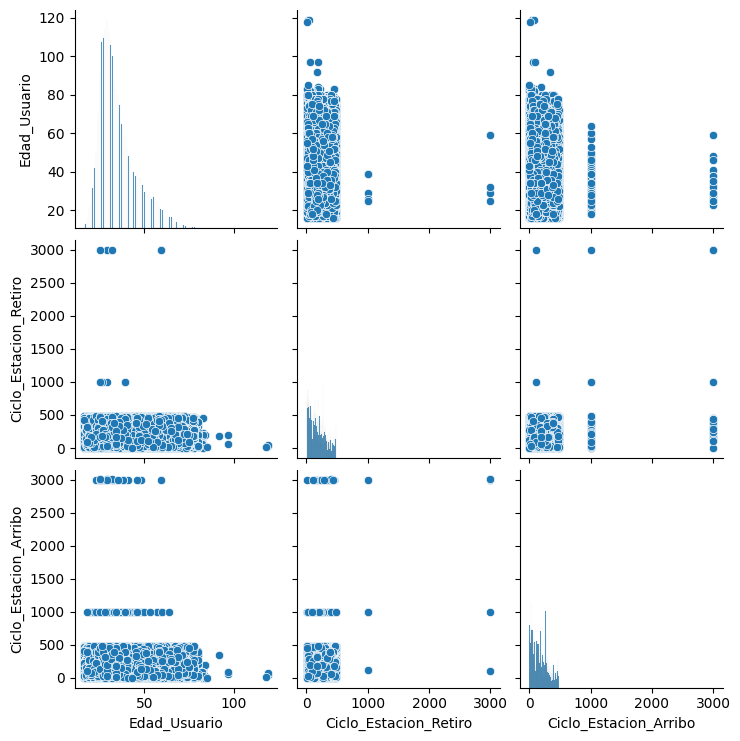

In [15]:
# Histogramas 
import seaborn as sns
import matplotlib.pyplot as plt

df_vis = df[['Edad_Usuario', 'Genero_Usuario', 'Ciclo_Estacion_Retiro', 'Ciclo_Estacion_Arribo']]
sns.pairplot(df_vis)



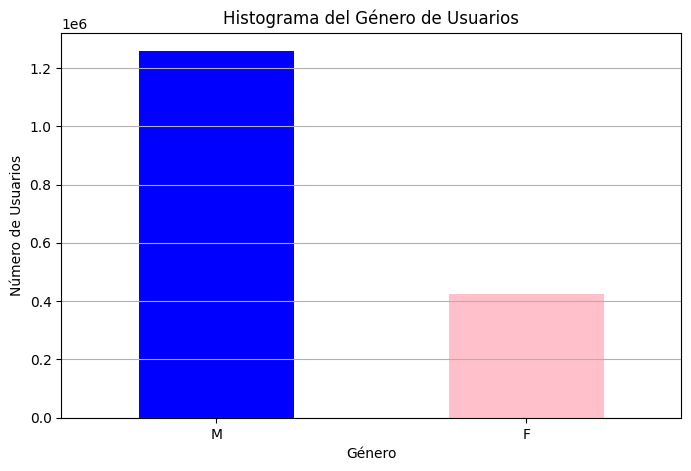

In [16]:
# Histograma genero 
plt.figure(figsize=(8, 5))
df['Genero_Usuario'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Histograma del Género de Usuarios')
plt.xlabel('Género')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=0)  
plt.grid(axis='y') 
plt.show()


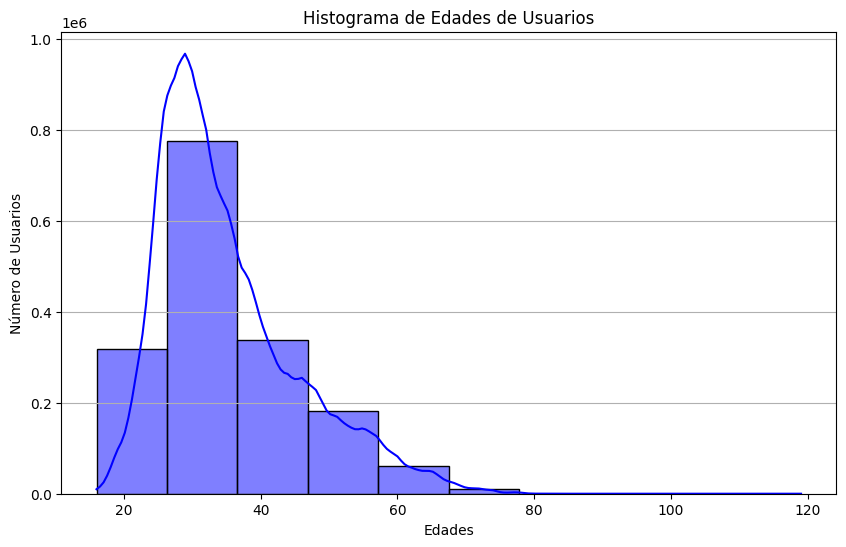

In [17]:
# Histograma de edades

plt.figure(figsize=(10, 6))

sns.histplot(df['Edad_Usuario'], bins=10, kde=True, color='blue')
plt.title('Histograma de Edades de Usuarios')
plt.xlabel('Edades')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=0)  
plt.grid(axis='y') 
plt.show()

In [18]:
# Dectar outliers de edad 
import numpy as np

# Calcular el rango intercuartílico
Q1 = df['Edad_Usuario'].quantile(0.25)  
Q3 = df['Edad_Usuario'].quantile(0.75) 
IQR = Q3 - Q1 

# Definir los límites 
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Detectar los outliers
outliers = df[(df['Edad_Usuario'] < limite_inferior) | (df['Edad_Usuario'] > limite_superior)]
print(f"Outliers detectados:\n{outliers}")

# Eliminar outliers
df = df[(df['Edad_Usuario'] >= limite_inferior) & (df['Edad_Usuario'] <= limite_superior)]


Outliers detectados:
        Genero_Usuario  Edad_Usuario   Bici  Ciclo_Estacion_Retiro  \
46                   M            60  12408                    122   
56                   M            64   8614                    382   
71                   M            66   9560                     58   
106                  M            61   7372                     77   
107                  F            60  12081                    254   
...                ...           ...    ...                    ...   
1682864              F            63   8323                     19   
1682867              M            60   9185                    334   
1682876              M            60   8613                     18   
1682895              M            60   9465                     45   
1683009              F            65  12127                    256   

        Fecha_Retiro Hora_Retiro  Ciclo_Estacion_Arribo Fecha_Arribo  \
46        2019-01-28    19:21:20                    106   2019-01-

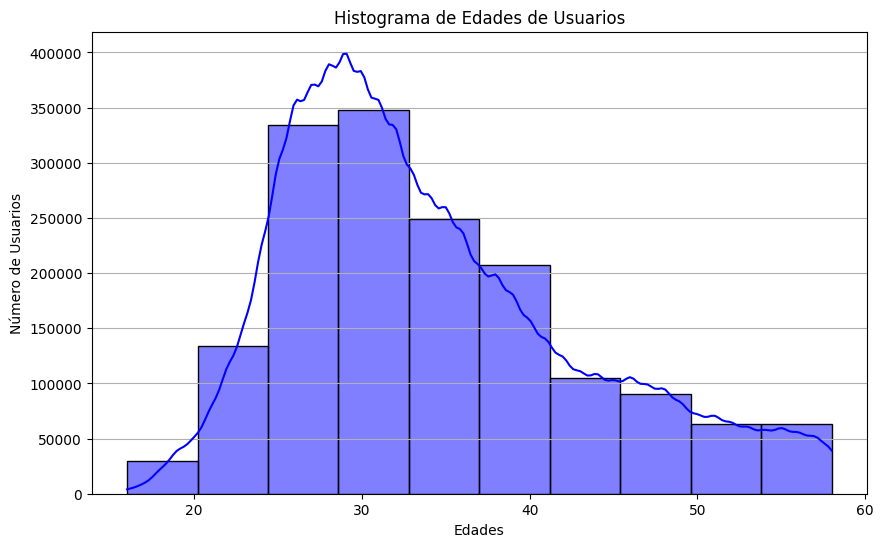

In [19]:
# Histograma de edades (sin outliers)

df_vis = df[['Edad_Usuario', 'Genero_Usuario', 'Ciclo_Estacion_Retiro', 'Ciclo_Estacion_Arribo']]

plt.figure(figsize=(10, 6))

sns.histplot(df['Edad_Usuario'], bins=10, kde=True, color='blue')
plt.title('Histograma de Edades de Usuarios')
plt.xlabel('Edades')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=0)  
plt.grid(axis='y') 
plt.show()


In [20]:
print(df['Edad_Usuario'].min())
print(df['Edad_Usuario'].max())

16
58


In [21]:
df.to_csv('./Data.csv', index=False)

## Data con estaciones


In [22]:
df_estaciones = pd.read_csv('stations.csv')

df_estaciones.rename(columns={'id': 'Ciclo_Estacion_Retiro'}, inplace=True)

df_final = pd.merge(df, df_estaciones, on='Ciclo_Estacion_Retiro', how='left')

print(df_final.head())


  Genero_Usuario  Edad_Usuario   Bici  Ciclo_Estacion_Retiro Fecha_Retiro  \
0              M            23  11925                    279   2019-01-06   
1              M            37     98                    103   2019-01-11   
2              M            26  10441                    174   2019-01-03   
3              M            32   9082                    176   2019-01-09   
4              M            55  10453                     45   2019-01-27   

  Hora_Retiro  Ciclo_Estacion_Arribo Fecha_Arribo Hora_Arribo        lat  \
0    06:52:49                    294   2019-01-06    06:58:59  19.399908   
1    14:07:24                    254   2019-01-11    14:11:00  19.441669   
2    10:18:32                     27   2019-01-03    10:26:10  19.441110   
3    08:34:16                     19   2019-01-09    08:43:47  19.442689   
4    08:10:21                    256   2019-01-27    08:28:22  19.418649   

         lon                                              name  
0 -99.166553   